# Trabajo práctico integrador 
## _Aprendizaje de Maquina_
### CEIA Co12

### Alumnos:
- Córdoba, Pablo
- Pérez Millán, Rodrigo

### Dataset:
- [Wine Quality](https://www.kaggle.com/datasets/joebeachcapital/wine-quality)
    - Licencia: Attribution 4.0 Internaltional 
    - Autor: Joakim Arvidsson

### Posible cuestión a resolver:

    - Predecir la calidad del vino "quality" en base a las variables de entrada.

***

## 1. Carga de datos

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol


Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = "./dataset"

In [3]:
#Leo las columnas
cols = pd.read_csv(DATASET_PATH + '/winequality.columns.csv').column.values.tolist()

print("Columnas: ", cols)

#Leo csv de vino rojo
data_red = pd.read_csv(DATASET_PATH + '/winequality-red.csv',
                       delimiter=';',
                       header=0,
                       names = cols
                    )

#Adjunto una columna nueva con el tipo
data_red["type"]="red"

#Leo csv de vino blanco
data_white = pd.read_csv(DATASET_PATH + '/winequality-white.csv',
                       delimiter=';',
                       header=0,
                       names = cols
                    )
#Adjunto una columna nueva con el tipo
data_white["type"]="white"

#Defino el df final de trabajo
df=pd.concat([data_white,data_red],ignore_index=True)

df.info()

Columnas:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1. Descripción general
Vamos a echar un vistazo a las primeras filas, verificar la existencia de valores nulos y observar algunas estadísticas básicas.

In [4]:
# Se observan las primeras filas
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

Las primeras filas nos dan una buena idea de cómo se ven los datos y podemos observar que las columnas han sido correctamente asignadas.

In [5]:
# Verificar datos faltantes
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


No hay valores nulos en ninguna columna, lo cual es excelente y simplifica el preprocesamiento.

In [6]:
# Estadísticas básicas
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Las estadísticas básicas nos proporciona información valiosa sobre la distribución de los datos. Podemos ver los valores promedio, desviaciones estándar, valores mínimos y máximos, entre otros.

In [7]:
df.loc[:,"type"]

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

### 2.2. Visualizaciones de distribuciones

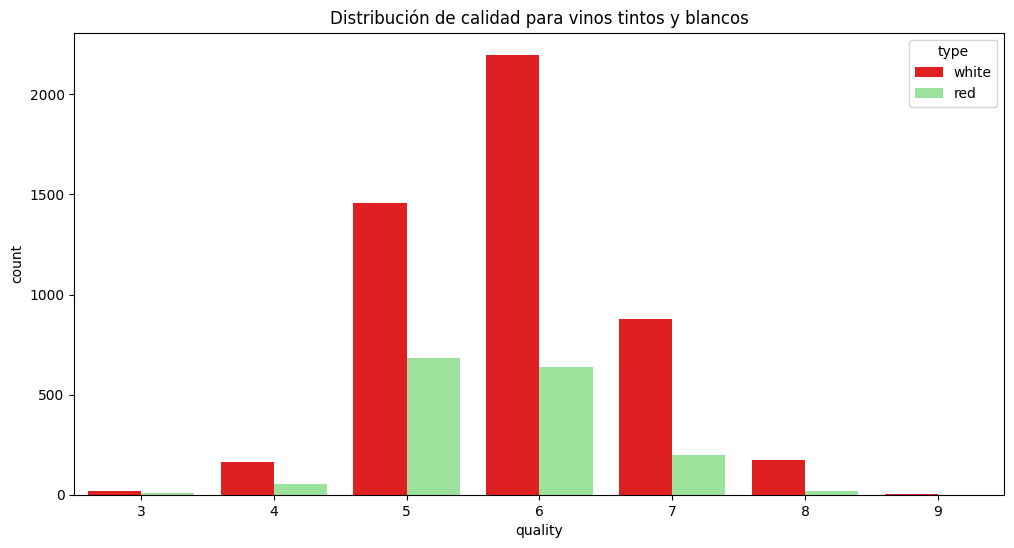

In [8]:
# Distribución de calidad para ambos tipos de vinos
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='quality', hue='type', palette=['red', 'lightgreen'])
plt.title("Distribución de calidad para vinos tintos y blancos")
plt.show()


La gráfica muestra la distribución de calidad para vinos tintos y blancos. A partir de la visualización, se pueden hacer las siguientes observaciones:

**Distribución de Calidad:** La mayoría de los vinos se encuentran en las categorías de calidad 5, 6 y 7, siendo 6 la más frecuente para ambos tipos de vinos.

**Vinos Blancos:** Parece que hay una mayor cantidad de vinos blancos que de vinos tintos en las categorías 5, 6 y 7.

**Vinos Tintos:** Los vinos tintos tienen una presencia más notable en las categorías 3, 4 y 8. La categoría 3, en particular, tiene muy pocos vinos blancos en comparación.

**Calidad Extrema:** Las calidades extremadamente altas (9) y bajas (3) son menos comunes, lo cual tiene sentido ya que es menos probable encontrar vinos que sean excepcionalmente buenos o malos en una muestra general.

Es una visualización útil para entender rápidamente la distribución de la calidad de los vinos según su tipo.

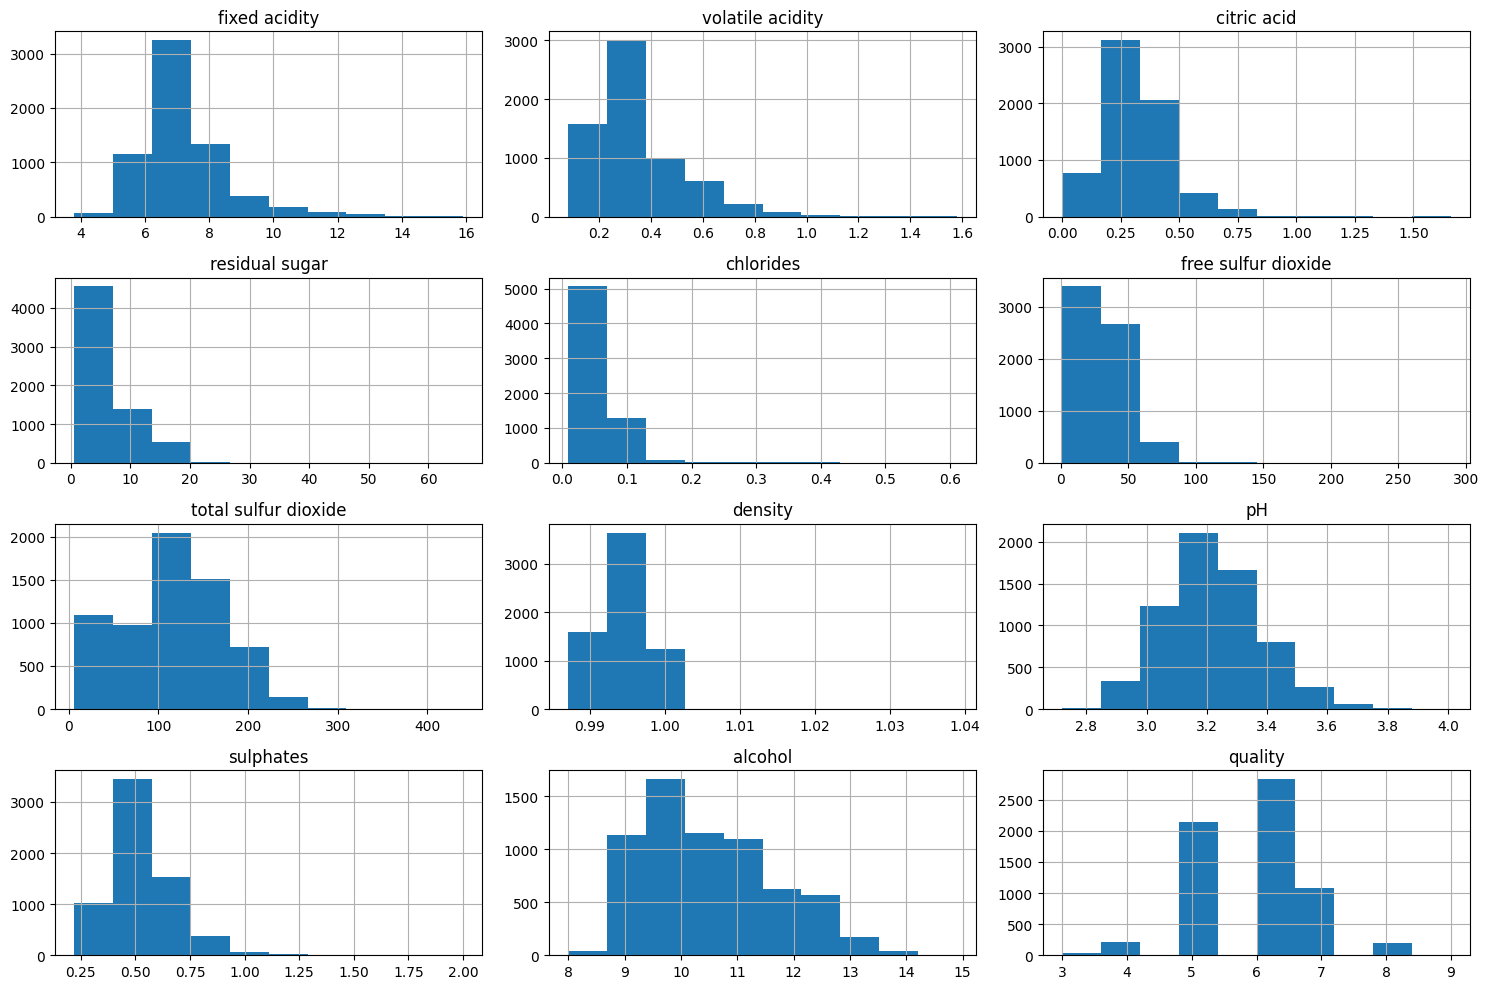

In [9]:
# Histogramas para cada variable
df.hist(figsize=(15, 10))
plt.tight_layout()  # ajusta el espaciado para que no haya superposición
plt.show()


Análisis de lo que se puede observar en los histogramas para cada variable:

1. **fixed acidity**: La mayoría de los vinos tienen una acidez fija entre 6 y 8. Hay una pequeña cantidad que tiene valores más altos o más bajos.

2. **volatile acidity**: Los valores se concentran principalmente en el rango de 0.2 a 0.8.

3. **citric acid**: Hay una concentración notable en torno a 0.5, pero los vinos con bajo ácido cítrico también son comunes.

4. **residual sugar**: La mayoría de los vinos tienen un azúcar residual de menos de 10, pero hay algunos con valores mucho más altos.

5. **chlorides**: La concentración es principalmente inferior a 0.1.

6. **free sulfur dioxide**: La mayoría de los valores están por debajo de 50, pero algunos vinos tienen valores mucho más altos.

7. **total sulfur dioxide**: Aunque hay vinos con una amplia gama de dióxido de azufre total, muchos tienen valores inferiores a 200.

8. **density**: La densidad está bastante concentrada alrededor de 1.0.

9. **pH**: La mayoría de los vinos tienen un pH entre 3.0 y 3.8, con una concentración central alrededor de 3.2.

10. **sulphates**: Están principalmente concentrados en el rango de 0.25 a 0.75.

11. **alcohol**: Aunque hay una variabilidad considerable, muchos vinos tienen un contenido de alcohol entre 9 y 13.

12. **quality**: La calidad del vino varía entre 3 y 9, pero la mayoría se concentra entre 5 y 7.


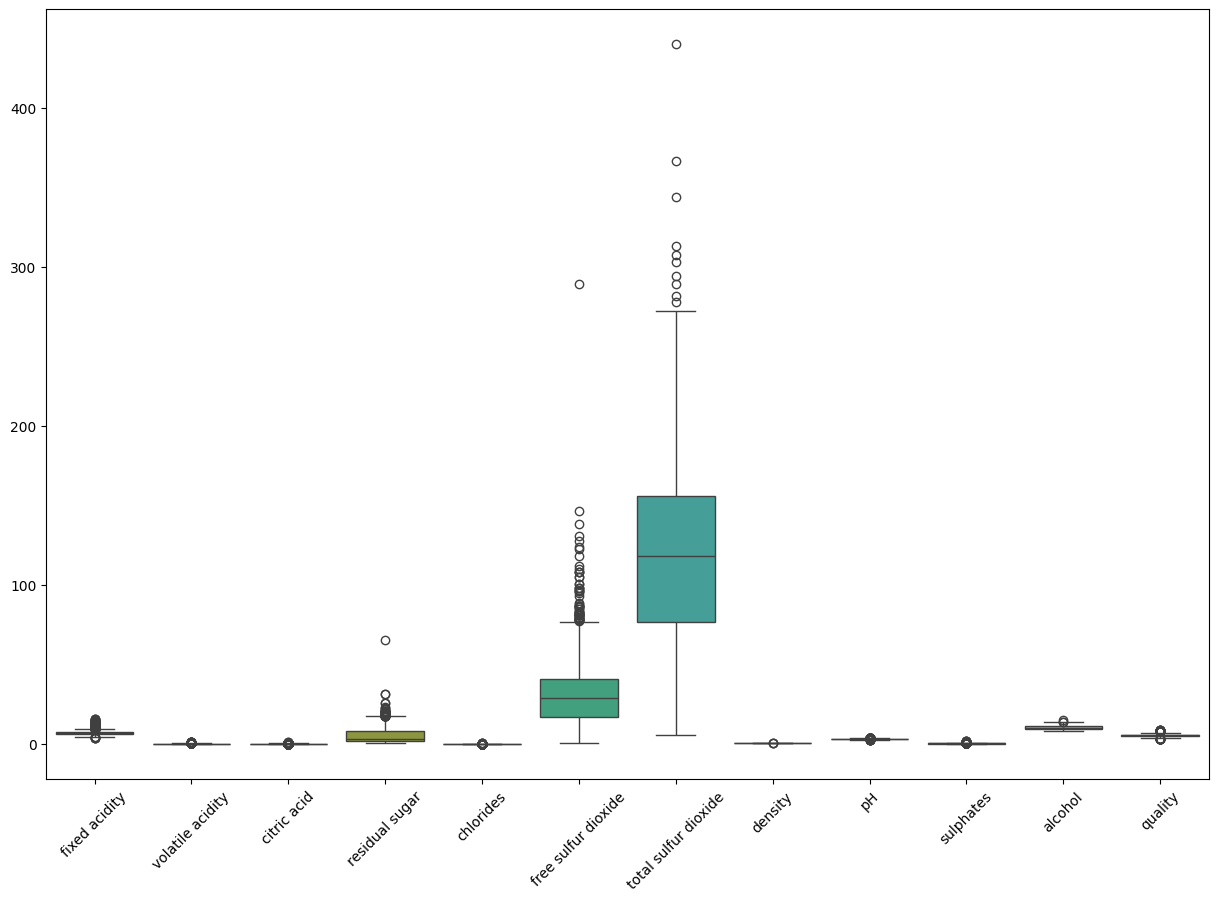

In [10]:
# Boxplots para entender las distribuciones y detectar posibles valores atípicos
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop('type', axis=1))  # Descartando columna categórica para el boxplot
plt.xticks(rotation=45)
plt.show()

Observando la gráfica de boxplot:

**Variables con valores atípicos evidentes:** Las características "residual sugar", "free sulfur dioxide", y "total sulfur dioxide" presentan valores atípicos bastante evidentes, es decir, puntos que están lejos del rango intercuartil (IQR). Estos valores atípicos pueden afectar modelos de regresión, por lo que sería una buena idea considerar técnicas para manejarlos.

**Distribución de los datos:** Las características "density", "pH", "sulphates", y "alcohol" parecen tener distribuciones más concentradas (basado en la altura de sus cajas) mientras que las características como "free sulfur dioxide" y "total sulfur dioxide" tienen distribuciones más dispersas.

**Diferencias en la escala:** Es evidente que las características tienen diferentes escalas, lo cual es particularmente claro cuando comparamos "residual sugar" con "pH" o "chlorides". Esto es importante porque muchos algoritmos de aprendizaje automático (como la regresión logística, SVM y k-means) son sensibles a la escala de los datos. Por lo tanto, es posible que se necesite estandarizar o normalizar los datos antes de entrenar tu modelo.

**Características con poca variación:** Características como "fixed acidity", "volatile acidity", y "chlorides" muestran poca variabilidad con respecto a sus cuartiles. Dependiendo del modelo, estas características podrían o no ser informativas.

### 2.3. Matriz de correlación

Esta matriz de correlación nos dará una idea de cómo las diferentes variables se relacionan entre sí, y en particular, cómo se relacionan con la calidad del vino. Es una herramienta útil para identificar relaciones potenciales y características que pueden ser importantes para modelos predictivos o para la comprensión general de las características del vino. Sin embargo, es importante recordar que la correlación no implica causalidad. Por lo tanto, aunque dos variables estén correlacionadas, no significa que una cause la otra. Es posible que haya factores subyacentes o que la relación sea coincidente.

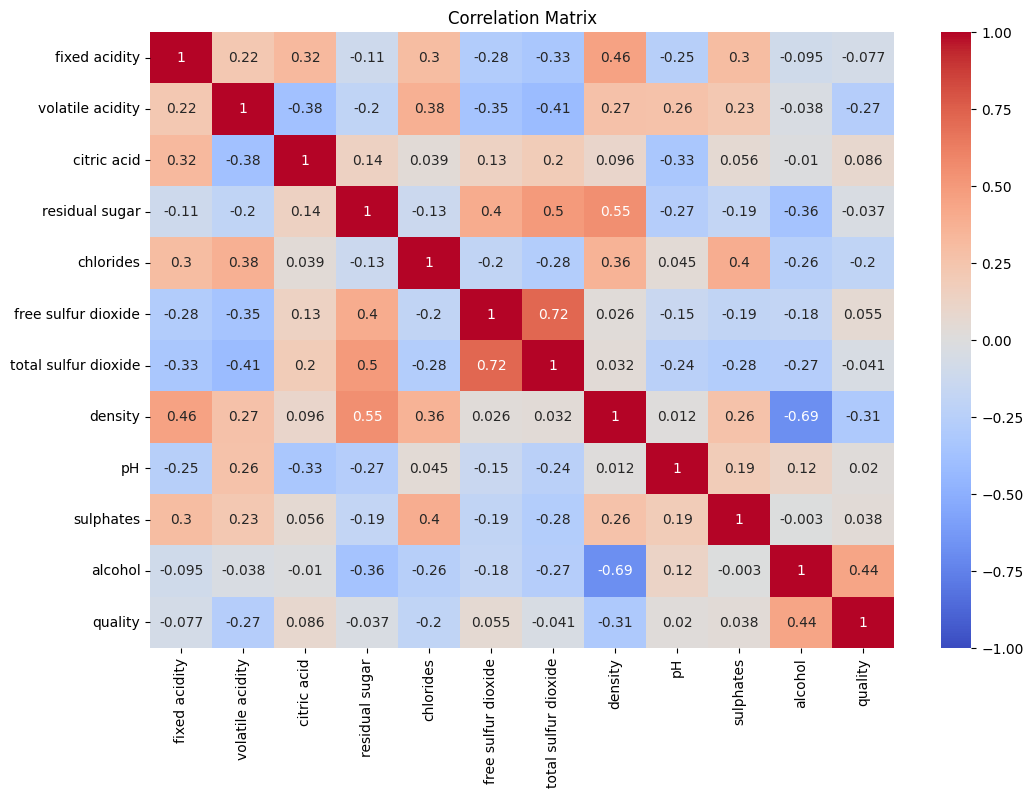

In [12]:
# Se excluye la columna no numérica y calcula la matriz de correlación
numeric_df = df.drop('type', axis=1)
corr_matrix = numeric_df.corr()

# Visualiza la matriz
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Analizando la gráfica de correlación obtenida podemos decir lo siguiente:

**Correlaciones fuertes:**

- "free sulfur dioxide" y "total sulfur dioxide" tienen una correlación de 0.72, lo cual es esperable ya que la cantidad de dióxido de azufre libre (sin unirse a otros compuestos) es un subconjunto del total.
- "density" y "residual sugar" tienen una correlación de 0.55, indicando que el azúcar residual puede influir en la densidad del vino.

**Correlaciones moderadas:**

- "fixed acidity" y "citric acid" tienen una correlación de 0.32, lo cual tiene sentido ya que el ácido cítrico es uno de los ácidos presentes en los vinos.
- "volatile acidity" y "citric acid" presentan una correlación negativa de -0.38. Esto sugiere que cuando uno aumenta, el otro tiende a disminuir.

**Relación con la calidad:**

- La correlación más fuerte que la calidad tiene con otra variable es con "alcohol" (0.44), lo que sugiere que el contenido de alcohol puede estar relacionado positivamente con la percepción de calidad. Sin embargo, es importante mencionar que una correlación de 0.44 no es extremadamente fuerte, pero es notable.
- Hay otras correlaciones más débiles entre la calidad y otras variables, pero ninguna tan prominente.

**Otros puntos de interés:**

- Hay algunas correlaciones negativas moderadas, como entre "density" y "alcohol" (-0.69), lo que indica que a medida que el contenido de alcohol aumenta, la densidad del vino tiende a disminuir.

### 2.4 Scatterplot de las variables

El scatterplot entre "alcohol" y "density" podría ser interesante para ver cómo se distribuyen estos datos, dado que tienen una correlación notable; y si hay una diferencia clara entre diferentes "types" de vino.

<Axes: xlabel='alcohol', ylabel='density'>

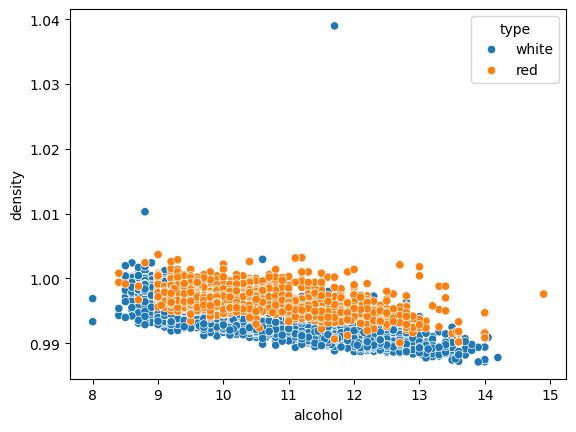

In [13]:
sns.scatterplot(data=df,x="alcohol",y="density",hue="type")

Esta gráfica de dispersión muestra una interesante relación entre el contenido de alcohol y la densidad de los vinos, separados por su tipo (rojo y blanco). Aquí hay algunas observaciones:

1. La mayoría de los vinos blancos y rojos tienen una densidad cercana al rango de 0.99 a 1.01. 
2. A medida que el contenido de alcohol aumenta, se observa una ligera tendencia decreciente en la densidad, especialmente para los vinos blancos.
3. Los vinos rojos tienden a tener un contenido de alcohol un poco más alto y una densidad ligeramente mayor en comparación con los vinos blancos, aunque hay una superposición considerable.
4. Hay algunos puntos atípicos, especialmente los pocos puntos con densidad superior a 1.03.

### 2.5. Visualización de outliers

El pairplot es una herramienta visual poderosa que nos proporciona una vista panorámica de las relaciones entre las diferentes variables del conjunto de datos.

Es importante buscar puntos que se desvíen significativamente de la tendencia general. Estos puntos pueden ser outliers o simplemente variaciones naturales.

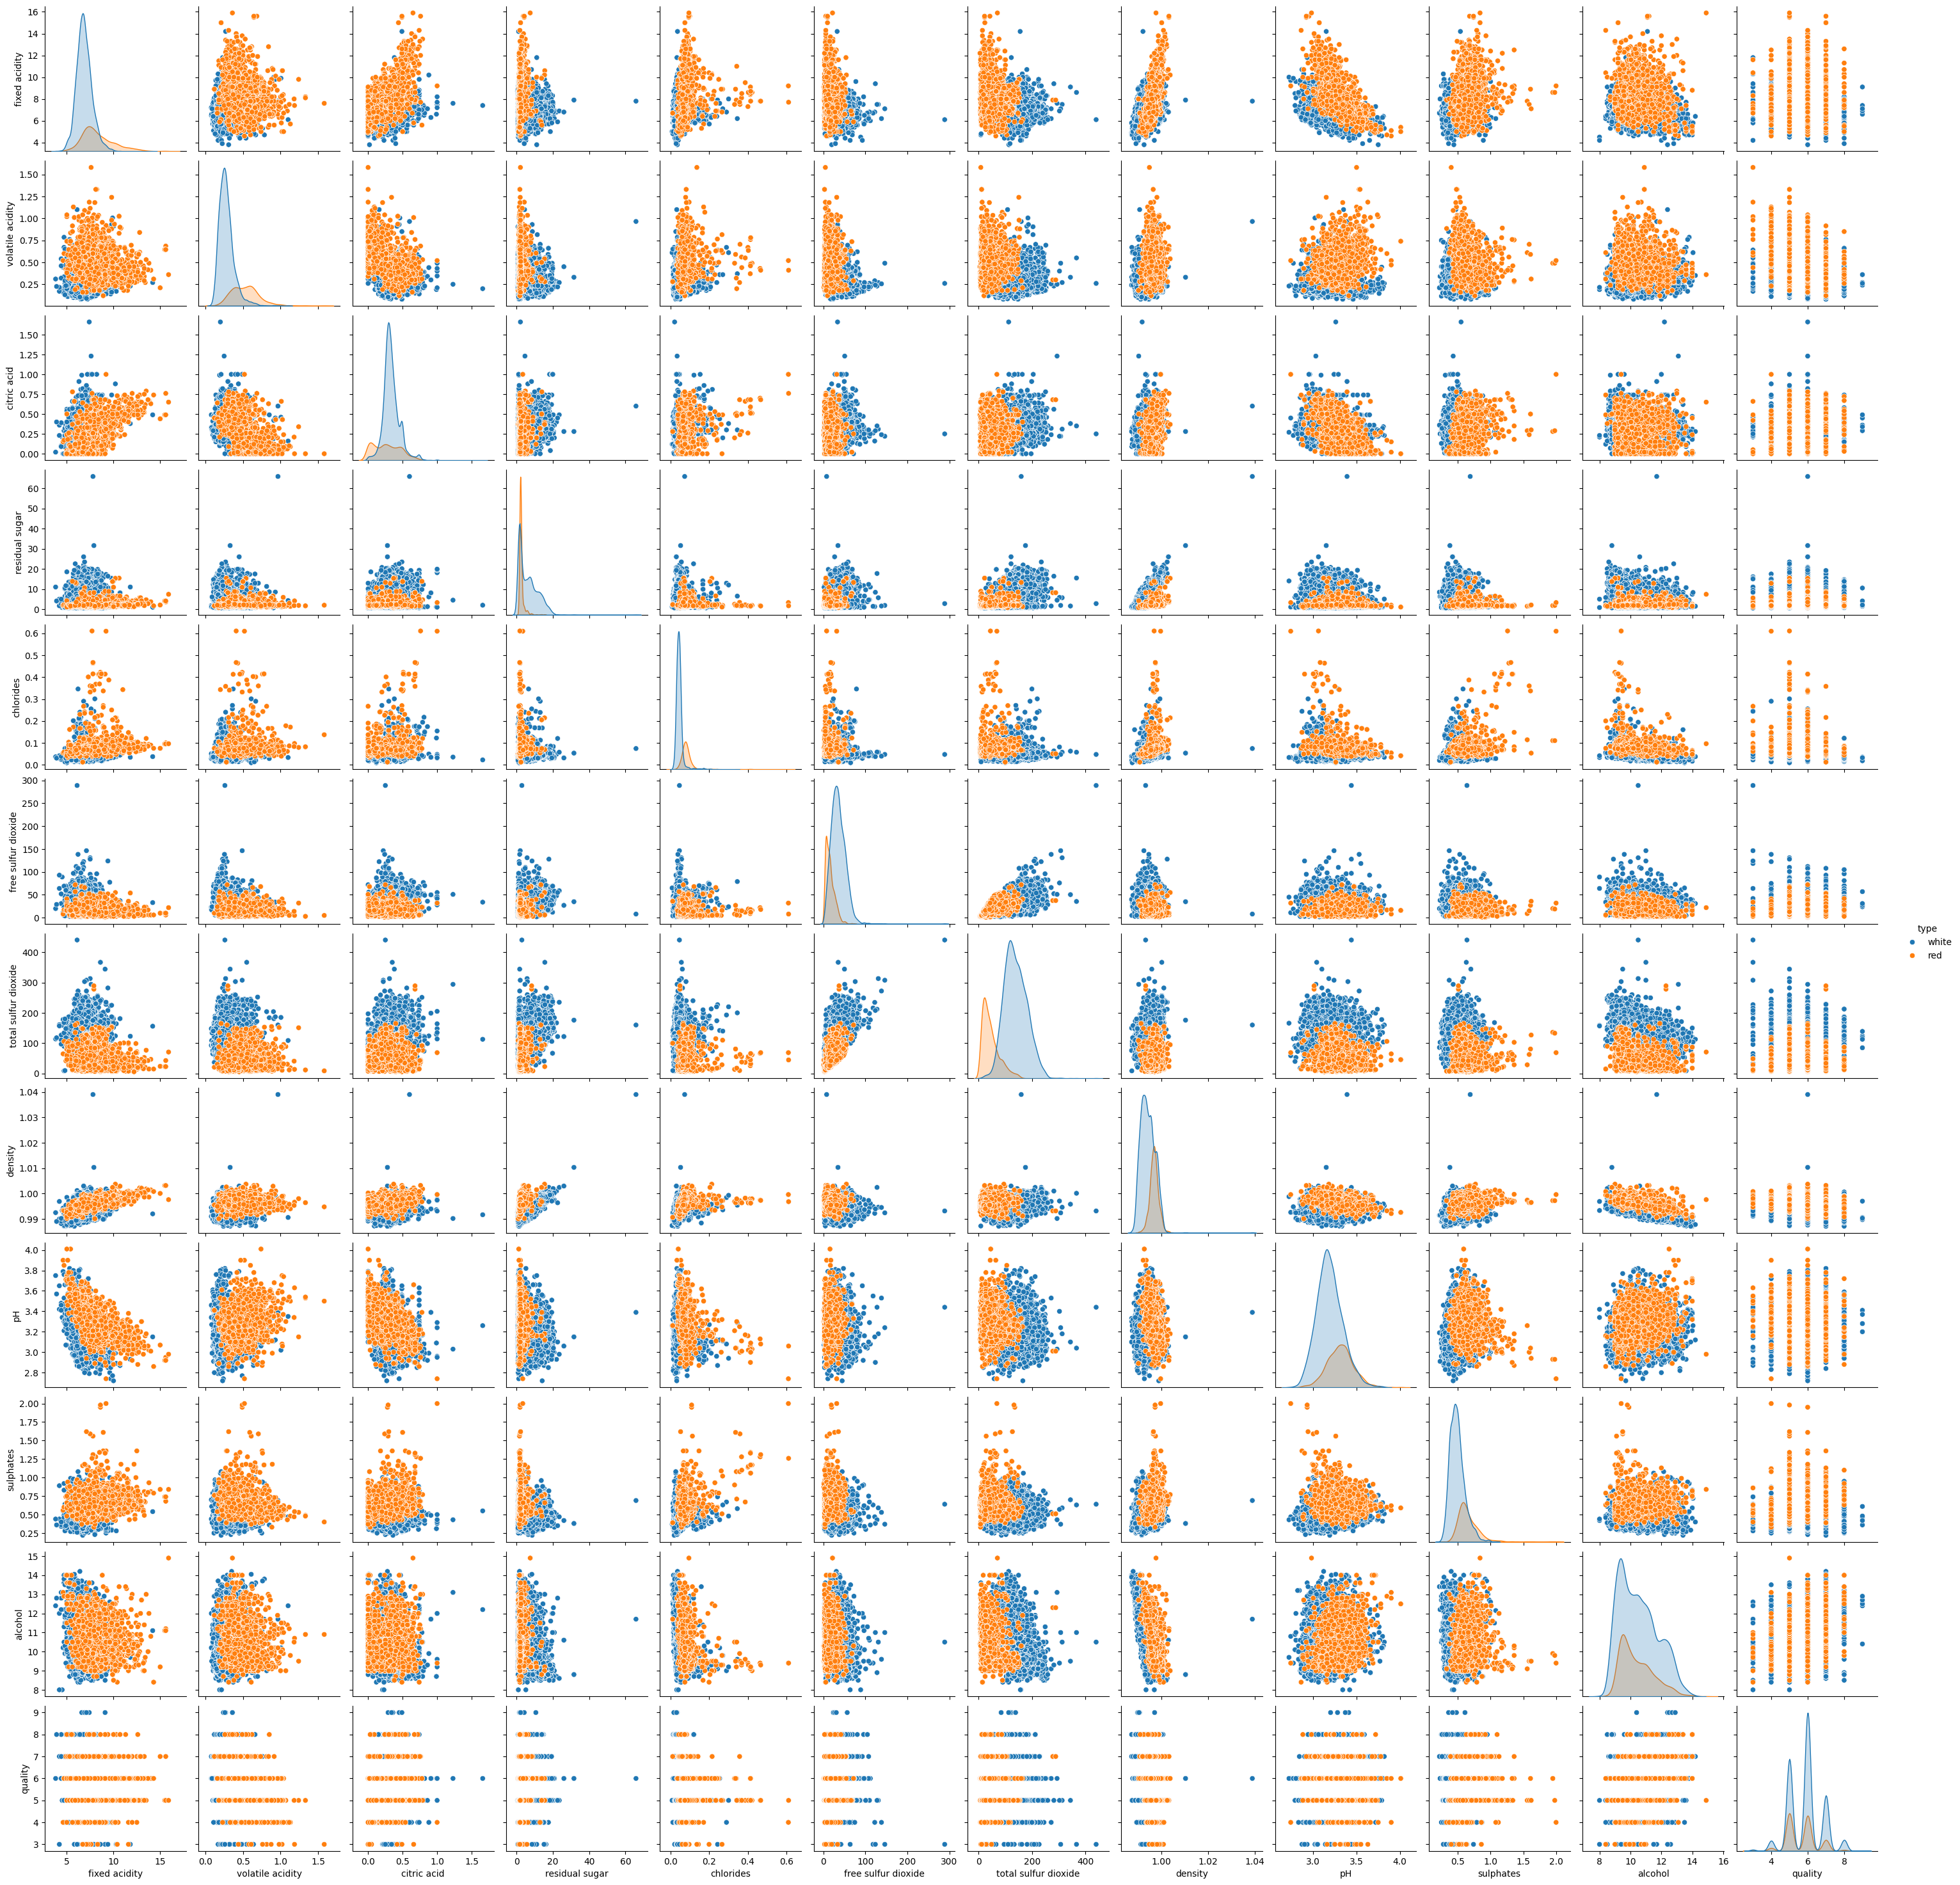

In [14]:
sns.pairplot(df, hue="type")

Analicemos la gráfica:

1. **Distribución de cada variable**: En la diagonal, podemos observar la distribución de cada variable. Aquí puedes identificar la forma de la distribución, modas, picos y posibles outliers. Por ejemplo, la variable "alcohol" muestra una distribución unimodal y se puede notar que hay algunos vinos con niveles más altos de alcohol.

2. **Relaciones bivariadas**: Fuera de la diagonal, puedes observar las relaciones entre dos variables. Esto es útil para identificar patrones, tendencias y posibles correlaciones entre variables. Por ejemplo, la relación entre "alcohol" y "density" que vimos anteriormente también se refleja aquí.

3. **Diferencias por tipo**: El color (naranja para los vinos tintos y azul para los blancos) nos permite identificar diferencias según el tipo de vino. Podemos ver que algunas variables, como el "free sulfur dioxide" y "total sulfur dioxide", muestran distribuciones claramente diferentes entre vinos tintos y blancos.

4. **Outliers**: En algunas tramas, como las que involucran "residual sugar", puedes ver puntos que están lejos de la mayoría.

5. **Colinealidad**: Si dos variables parecen tener una relación lineal muy fuerte, es posible que sean colineales, lo que puede ser problemático en algunos análisis. En la gráfica de pairplot podemos identificar potenciales signos de colinealidad entre algunas variables observando las relaciones que parecen lineales. Estas son algunas de las relaciones que muestran signos de colinealidad:

    - free sulfur dioxide y total sulfur dioxide: Hay una tendencia clara y positiva entre estas dos variables, lo que sugiere que cuando una aumenta, la otra también tiende a aumentar.

    - fixed acidity y density: También se observa una relación lineal positiva entre estas dos variables, aunque no es tan fuerte como la anterior.

    - fixed acidity y citric acid: Aunque no es una relación perfectamente lineal, hay una tendencia general de que cuando la acidez fija aumenta, el ácido cítrico también lo hace.

Con base en esta gráfica, podemos:
- Decidir qué variables incluir en modelos posteriores.
- Identificar la necesidad de transformar algunas variables para normalizar su distribución.
- Detectar y tratar outliers, si se considera necesario.


## 3. Preprocesamiento

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 3.1 Conversión de características categóricas a numéricas

Convertimos la variable categórica "type" a numérica con el método one-hot encoding.

In [16]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

### Eliminación de variables colineales

Dada la colinealidad identificada en pasos anteriores, se considera lo siguiente:

- Entre free sulfur dioxide y total sulfur dioxide, se opta por usar solo una de ellas, preferiblemente total sulfur dioxide ya que podría contener más información al ser una suma de compuestos relacionados.
- Dada la relación entre fixed acidity y citric acid, se considera usar solo una de ellas. La elección se realiza arrojando una moneda.

In [17]:
# Eliminando variables con colinealidad
df = df.drop(columns=['free sulfur dioxide', 'citric acid'])

# Transformando variables con distribuciones sesgadas
# Usando una transformación logarítmica para 'residual sugar', 'chlorides', 'free sulfur dioxide', y 'total sulfur dioxide'
cols_to_transform = ['residual sugar', 'chlorides', 'total sulfur dioxide']
for col in cols_to_transform:
    # Sumando 1 antes de tomar el log para evitar log(0)
    df[col] = np.log1p(df[col])

### 3.2 División de los datos en conjuntos de entrenamiento y prueba

El próximo paso es dividir los datos en conjuntos de entrenamiento y prueba. Es importante hacer esta división antes de realizar el escalado para evitar la fuga de datos (data leakage). El escalado se debe realizar basándose únicamente en la información del conjunto de entrenamiento.

In [18]:
# Define X (features) y y (target)
X = df.drop('quality', axis=1)
y = df['quality']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3.3 Escalado

In [ ]:
# Escala los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Solo transformamos X_test con el scaler ajustado a X_train

## 4. Modelado

### 4.1. Modelo de regresion lineal

**Justificación para la Elección del Modelo de Regresión Lineal:**

La regresión lineal es uno de los métodos estadísticos más conocidos y ampliamente utilizados en el análisis predictivo. Se seleccionó este modelo por las siguientes razones:

1. **Simplicidad y Transparencia**: La regresión lineal proporciona un modelo claro y comprensible, permitiendo interpretar fácilmente la relación entre las variables independientes y la variable objetivo. A diferencia de modelos más complejos, los coeficientes de la regresión nos ofrecen una interpretación directa del impacto de cada característica en la predicción.

2. **Base de Comparación**: Dada su naturaleza fundamental en la estadística y el aprendizaje automático, la regresión lineal a menudo sirve como un punto de referencia inicial. Es útil para comparar su desempeño con otros modelos más complejos que se puedan considerar posteriormente.

3. **Eficiencia Computacional**: La regresión lineal es computacionalmente menos costosa en comparación con modelos más avanzados. Esto significa que se puede entrenar y predecir rápidamente, lo cual es beneficioso, especialmente en las etapas iniciales del análisis.

4. **Linealidad Presumida**: A partir de un análisis exploratorio de los datos y visualizaciones iniciales, se asumió que existía una relación lineal entre algunas de las características y la variable objetivo. Si bien esto es una suposición, es un punto de partida razonable, y el desempeño del modelo nos puede dar pistas sobre la validez de esta suposición.

5. **Flexibilidad**: A pesar de su simplicidad, la regresión lineal puede adaptarse a patrones no lineales mediante la ingeniería de características, como la inclusión de términos polinómicos o interacciones entre características.

En resumen, la elección inicial del modelo de regresión lineal se basa en su simplicidad, transparencia y eficiencia. Es una primera aproximación que nos permite establecer una línea base sobre la cual mejorar y explorar modelos más complejos si es necesario.


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear el modelo de regresión lineal
lr_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr_model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = lr_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para evaluar el desempeño del modelo
mse = mean_squared_error(y_test, y_pred)
# Calcular el error absoluto medio (MAE) para evaluar el desempeño del modelo
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Error Cuadrático Medio (MSE): 0.48
Mean Absolute Error (MAE): 0.55


**Análisis del Modelo Lineal**

Tras entrenar el modelo lineal para predecir la calidad del vino, se evaluaron sus predicciones utilizando dos métricas de error: el Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE).

- Error Cuadrático Medio (MSE): 0.48

El MSE es particularmente sensible a errores grandes, ya que eleva al cuadrado las diferencias entre las predicciones y los valores reales. Un valor de 0.48 sugiere que, en términos de errores cuadrados, nuestras predicciones tienen cierto grado de variabilidad en relación con los valores verdaderos.

- Error Absoluto Medio (MAE): 0.55

El MAE es una métrica más directa e intuitiva. Un valor de 0.55 indica que, en promedio, las predicciones del modelo están alejadas en 0.55 unidades del valor real. Dado que el MAE es menos sensible a errores extremos que el MSE, este valor proporciona una visión más equilibrada del rendimiento general del modelo.

**Conclusión**

La diferencia entre el MSE y el MAE no es muy grande, lo que sugiere que no hay errores extremadamente grandes distorsionando el MSE. Sin embargo, es importante tener en cuenta que incluso errores pequeños pueden ser significativos dependiendo del contexto y de la importancia de las predicciones precisas.

Un MAE de 0.55 indica que las predicciones, aunque relativamente cercanas a los valores reales en promedio, aún tienen margen de mejora. Es posible que otros modelos o técnicas de preprocesamiento adicional puedan mejorar estos resultados. Además, es crucial considerar estos errores en relación con la escala y distribución de la variable objetivo, "quality", para determinar la aceptabilidad de estos errores en un contexto práctico.

### 4.2. Modelo Random Forest

Los bosques aleatorios son muy populares en problemas de regresión y clasificación debido a su capacidad para capturar relaciones no lineales y su resistencia a los outliers. Estos modelos no requieren escalar los datos, pero como ya se ha hecho, no afectará su rendimiento. Además, el modelo de Random Forest proporcionará una medida de la importancia de las características, lo que puede ser útil para la interpretación y selección de características.

#### 4.2.1. Entrenamiento del modelo de bosques aleatorios:

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

#### 4.2.2. Evaluación del modelo:

In [25]:
# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular el MSE y el MAE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Error Cuadrático Medio (MSE) del Random Forest: {mse_rf:.2f}')
print(f'Mean Absolute Error (MAE) del Random Forest: {mae_rf:.2f}')


Error Cuadrático Medio (MSE) del Random Forest: 0.34
Mean Absolute Error (MAE) del Random Forest: 0.42


**Análisis de Modelo Random Forest**

El modelo de Random Forest ha mejorado significativamente el rendimiento en comparación con el modelo lineal. El Error Cuadrático Medio (MSE) ha disminuido de 0.48 a 0.34, lo que indica una mejor precisión en las predicciones. De manera similar, el Mean Absolute Error (MAE) también ha mostrado una mejora, reduciéndose de 0.55 a 0.42. Este es un indicativo claro de que el modelo de Random Forest ha logrado capturar relaciones no lineales entre las características y la variable objetivo, que el modelo lineal no pudo identificar completamente.

**Conclusión**

El modelo de Random Forest ofrece una mejora considerable en el rendimiento con respecto al modelo lineal para predecir la calidad del vino en este conjunto de datos. La reducción en ambos errores (MSE y MAE) sugiere que el Random Forest puede ser un candidato más adecuado para este problema en particular.

#### 4.2.3. Importancia de las características:

Este paso te permitirá ver qué características tienen más influencia en la predicción.

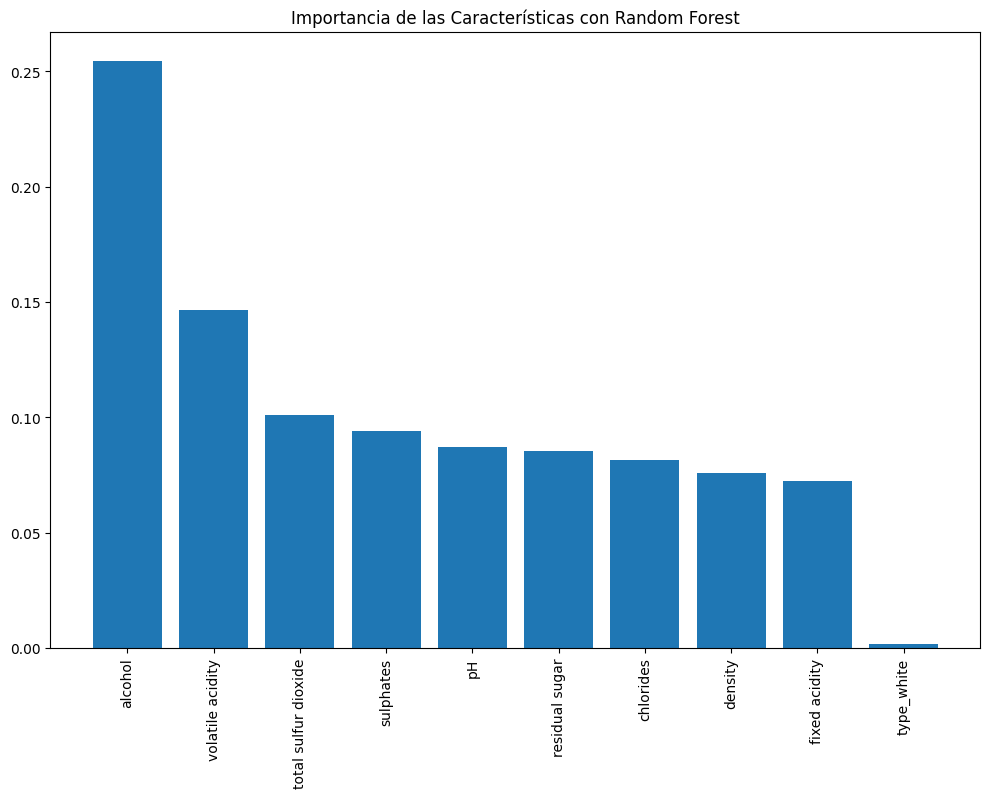

In [27]:
# Obtener la importancia de las características
importances = rf_model.feature_importances_
features = df.drop(columns=['quality']).columns 

# Ordenar las características por importancia
sorted_idx = np.argsort(importances)[::-1]

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.bar(features[sorted_idx], importances[sorted_idx])
plt.xticks(rotation=90)
plt.title('Importancia de las Características con Random Forest')
plt.show()


Basándose en la gráfica, aquí hay algunas observaciones sobre la importancia de las características determinadas por el modelo Random Forest:

1. **Alcohol**: Esta es, con diferencia, la característica más importante según el modelo. Tiene sentido, ya que el contenido de alcohol en el vino a menudo se correlaciona con su calidad. Vinos con un equilibrio adecuado de alcohol suelen ser más apreciados.

2. **Volatile Acidity**: La acidez volátil es la segunda característica más importante. Los niveles más altos de acidez volátil suelen estar asociados con un sabor avinagrado, lo que puede afectar negativamente a la percepción de la calidad del vino.

3. **Total Sulfur Dioxide**: Aunque menos importante que las dos anteriores, el dióxido de azufre total aún tiene una relevancia significativa. El dióxido de azufre se utiliza como conservante y, en altas concentraciones, puede afectar negativamente al sabor y al aroma del vino.

4. Las demás características, como **sulphates**, **pH**, **residual sugar**, **chlorides**, y **density**, tienen importancias similares y moderadas en la predicción. Cada una de estas características puede influir en el sabor, aroma y textura del vino, lo que, a su vez, puede afectar a su calidad.

5. **Fixed Acidity** y **Type_White** parecen ser las características menos importantes según este modelo. Sin embargo, sigue siendo relevante considerarlas, ya que incluso las características con menor importancia pueden aportar información valiosa al modelo.

**Conclusión**

La gráfica proporciona una visión clara de qué características tienen el mayor impacto en la calidad percibida del vino según el modelo Random Forest. Al considerar estas características con más detalle y enfocar los esfuerzos de mejora en ellas, se puede potencialmente mejorar la calidad del vino o afinar aún más los modelos predictivos.

#### 4.2.4. Optimización de Hiperparámetros para Random Forest

La optimización de hiperparámetros es un proceso esencial para mejorar el rendimiento de un modelo.

Para la optimización de hiperparámetros del modelo Random Forest, se puede utilizar GridSearchCV o RandomizedSearchCV de la biblioteca sklearn. Estos métodos buscan automáticamente las mejores combinaciones de hiperparámetros para un modelo dado.

A continuación, se utilizará RandomizedSearchCV con el modelo Random Forest. Esta técnica busca aleatoriamente combinaciones de hiperparámetros en lugar de probar todas las posibles combinaciones como lo hace GridSearchCV, lo que lo hace más eficiente en términos de tiempo.

Este código llevará a cabo una búsqueda aleatoria entre las combinaciones de hiperparámetros definidas en param_dist. Una vez finalizada la búsqueda, el código evaluará el rendimiento del mejor modelo encontrado y te mostrará los resultados.

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el rango de hiperparámetros para la búsqueda
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar Random Forest
rf = RandomForestRegressor()

# Inicializar RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Entrenar el modelo
rf_random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = rf_random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Evaluar el modelo con los mejores hiperparámetros
best_rf_model = rf_random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f'Error Cuadrático Medio (MSE) del Random Forest Optimizado: {mse_best_rf:.2f}')
print(f'Mean Absolute Error (MAE) del Random Forest Optimizado: {mae_best_rf:.2f}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Error Cuadrático Medio (MSE) del Random Forest Optimizado: 0.32
Mean Absolute Error (MAE) del Random Forest Optimizado: 0.37


**Análisis de los resultados obtenidos**

El proceso de optimización de hiperparámetros para el modelo Random Forest se llevó a cabo utilizando _RandomizedSearchCV_, una técnica que realiza una búsqueda aleatoria sobre el espacio de hiperparámetros definido. Esta metodología es una alternativa eficiente en comparación con la búsqueda exhaustiva (Grid Search), especialmente cuando el espacio de hiperparámetros es extenso.

El espacio de búsqueda consistió en:

    - n_estimators: número de árboles en el bosque.
    - max_features: número máximo de características a considerar para hacer la mejor división.
    - max_depth: profundidad máxima del árbol.
    - min_samples_split: número mínimo de muestras requeridas para dividir un nodo interno.
    - min_samples_leaf: número mínimo de muestras requeridas para estar en un nodo hoja.
    - bootstrap: método para muestrear conjuntos de datos al construir árboles.

Después de realizar la optimización, se identificaron los siguientes hiperparámetros como los más adecuados para el modelo:

    - n_estimators: 500
    - min_samples_split: 2
    - min_samples_leaf: 1
    - max_features: 'log2'
    - max_depth: 40
    - bootstrap: False

Con estos hiperparámetros, el modelo Random Forest optimizado logró un Error Cuadrático Medio (MSE) de 0.32 y un Error Absoluto Medio (MAE) de 0.37 en el conjunto de prueba.

**Conclusión**

La optimización de hiperparámetros es una etapa crucial en la construcción de modelos de aprendizaje automático, ya que permite afinar y mejorar el desempeño del modelo en tareas de predicción. A través del proceso de _RandomizedSearchCV_, pudimos identificar un conjunto óptimo de hiperparámetros para el modelo Random Forest que resultó en un rendimiento mejorado, evidenciado por una disminución en los errores MSE y MAE.

## Conclusión General

A lo largo de este proyecto, se llevaron a cabo análisis detallados y optimizaciones en dos algoritmos prominentes en el mundo del aprendizaje automático: la Regresión Lineal y el Random Forest.

Con la Regresión Lineal, se estableció un modelo base que sirvió como punto de referencia inicial. A pesar de la simplicidad inherente de este modelo, demostró ser competente, proporcionando resultados que nos dieron una idea inicial del comportamiento de los datos y su relación lineal. Sin embargo, como es común con los modelos lineales, ciertas limitaciones y suposiciones podrían no capturar toda la complejidad subyacente en los datos.

Por otro lado, el modelo de Random Forest, un algoritmo basado en ensambles, ofreció una aproximación más flexible y robusta. Mediante una búsqueda exhaustiva de hiperparámetros, se optimizó este modelo para lograr un rendimiento aún mejor. Los resultados obtenidos reflejaron no solo una reducción en las métricas de error, sino también la capacidad del Random Forest de modelar relaciones no lineales y su resistencia a overfitting en comparación con modelos más simples.

Al comparar ambos enfoques, el Random Forest claramente superó a la Regresión Lineal en términos de precisión y rendimiento general, lo que lo destaca como una elección preferible para este conjunto de datos en particular. Sin embargo, es esencial recordar que la elección del modelo depende en gran medida del contexto y los objetivos del proyecto. Mientras que el Random Forest ofrece una capacidad predictiva superior, la Regresión Lineal brinda transparencia y facilidad de interpretación.